In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('xxxxx.csv')

In [ ]:
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
434,435,306,103,3,3.5,3.0,8.21,0,0.64
4,5,314,103,2,2.0,3.0,8.21,0,0.65
52,53,334,116,4,4.0,3.0,8.00,1,0.78
479,480,325,110,4,4.5,4.0,8.96,1,0.79
466,467,314,99,4,3.5,4.5,8.73,1,0.71


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
# Drop column 'Serial No.'
df.drop('Serial No.', axis = 1, inplace = True)

# Rename column names 
df.columns = [c.replace(' ', '_') for c in df.columns]

df.rename(columns = {'LOR_':'LOR'}, inplace = True)

df.rename(columns = {'Chance_of_Admit_':'Chance_of_Admit'}, inplace = True)

In [ ]:
df.isna().sum()

# No null values in the dataset

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

##Non-Graphical Analysis


---

In [ ]:
# To check unique values in the columns
for i in df.columns:
  if i not in ('GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit'):
    print(i)
    print('-------------')
    print('Total unique values :', df[i].nunique())
    print(df[i].unique())
    print()

University_Rating
-------------
Total unique values : 5
[4 3 2 5 1]

SOP
-------------
Total unique values : 9
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]

LOR
-------------
Total unique values : 9
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]

Research
-------------
Total unique values : 2
[1 0]



In [ ]:
# To check distribution of values in the columns 
for i in df.columns:
  if i not in ('GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit'):
    print(i)
    print('-------------')
    print(df[i].value_counts(normalize = True))
    print()

# Insights
# 56% of the students have Research Experience.

University_Rating
-------------
3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University_Rating, dtype: float64

SOP
-------------
4.0    0.178
3.5    0.176
3.0    0.160
2.5    0.128
4.5    0.126
2.0    0.086
5.0    0.084
1.5    0.050
1.0    0.012
Name: SOP, dtype: float64

LOR
-------------
3.0    0.198
4.0    0.188
3.5    0.172
4.5    0.126
2.5    0.100
5.0    0.100
2.0    0.092
1.5    0.022
1.0    0.002
Name: LOR, dtype: float64

Research
-------------
1    0.56
0    0.44
Name: Research, dtype: float64



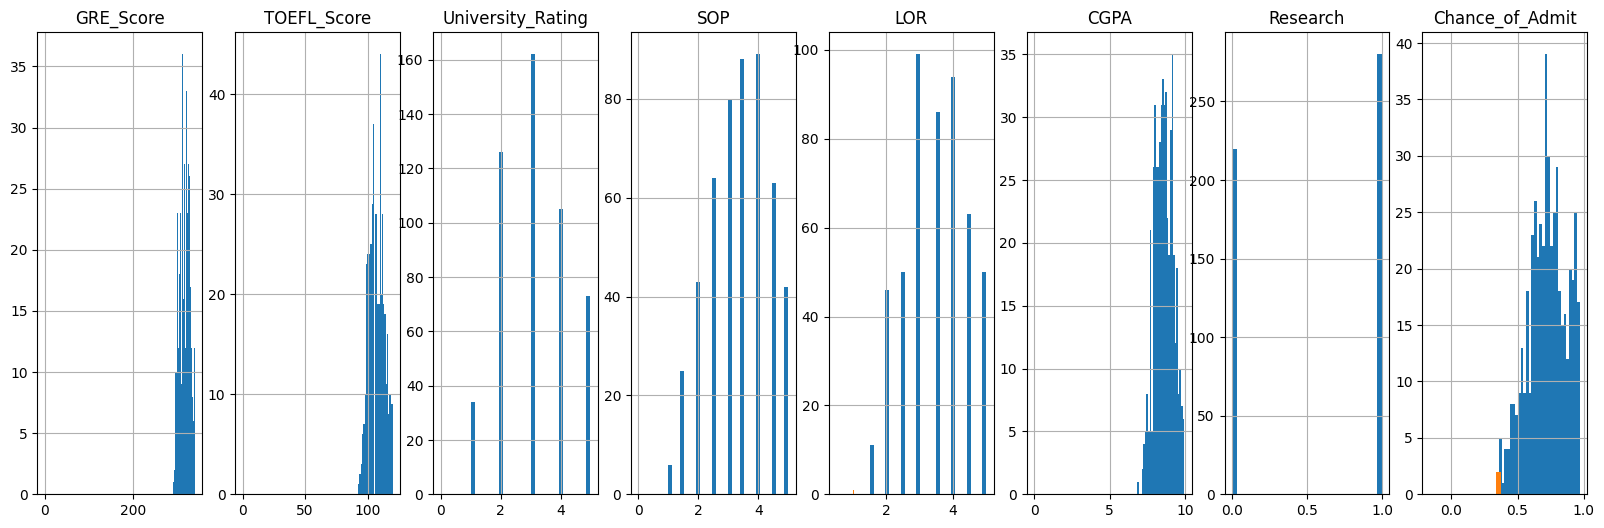

In [ ]:
# Outlier detection
fig = plt.figure() 
fig.set_size_inches(20, 6)
columns = df.columns

def detect_outliers(d):
    iqr = d.quantile(0.75) - d.quantile(0.25)
    upper = d.quantile(0.75) + 1.5*iqr
    lower = d.quantile(0.25) - 1.5*iqr
    return d.loc[(d < lower) | (d > upper)]

for i in range(len(columns)):
  plt.subplot(1, len(columns), i+1)
  plt.title(columns[i])
  ol = detect_outliers(df[columns[i]])
  df.loc[~df.index.isin(ol.index)][columns[i]].hist(bins=30)
  ol.hist(bins=30)

plt.show()

# Insights
# There doesn't seem to be many outliers in the dataset

##Visual Analysis


---



Univariate and Bivariate Analysis

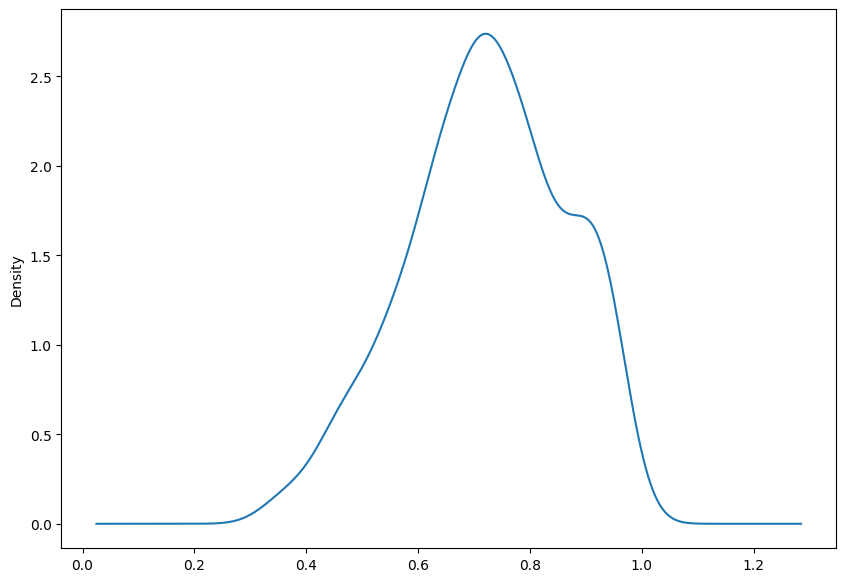

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))

df['Chance_of_Admit'].plot(kind = 'kde')

plt.show()

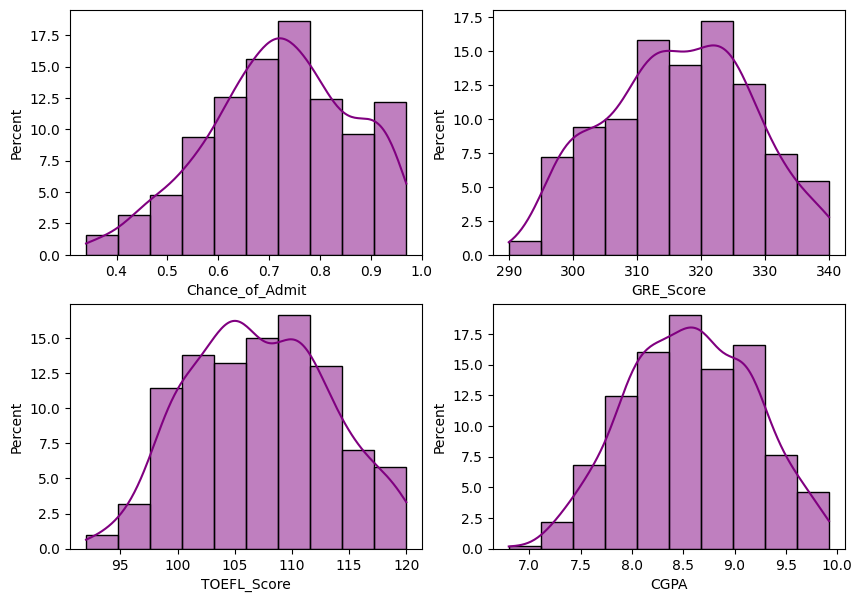

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10,7))

sns.histplot(data=df, x = 'Chance_of_Admit', stat = 'percent', kde= True, color = 'purple', bins = 10, ax = ax[0][0])
sns.histplot(data=df, x = 'GRE_Score', stat = 'percent', color = 'purple', kde= True, bins = 10, ax = ax[0][1])
sns.histplot(data=df, x = 'TOEFL_Score', stat = 'percent', color = 'purple', kde= True, bins = 10, ax = ax[1][0])
sns.histplot(data=df, x = 'CGPA', stat = 'percent', color = 'purple', kde= True, bins = 10, ax = ax[1][1])

plt.show()

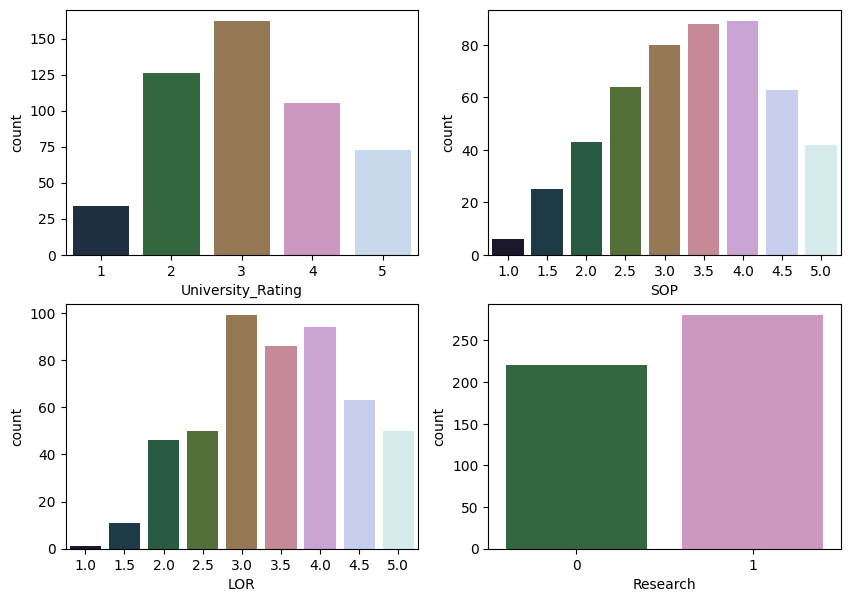

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10,7))

sns.countplot(data = df, x = 'University_Rating', palette = 'cubehelix', ax = ax[0][0])
sns.countplot(data = df, x = 'SOP', palette = 'cubehelix', ax = ax[0][1])
sns.countplot(data = df, x = 'LOR', palette = 'cubehelix', ax = ax[1][0])
sns.countplot(data = df, x = 'Research', palette = 'cubehelix', ax = ax[1][1])

plt.show()

# Insights
# Majority of students are from Universities having rating 3
# Majority of students have got SOP strength between 3-4
# Majority of students have a Research background
# Majority of students have got LOR strength between 3-4

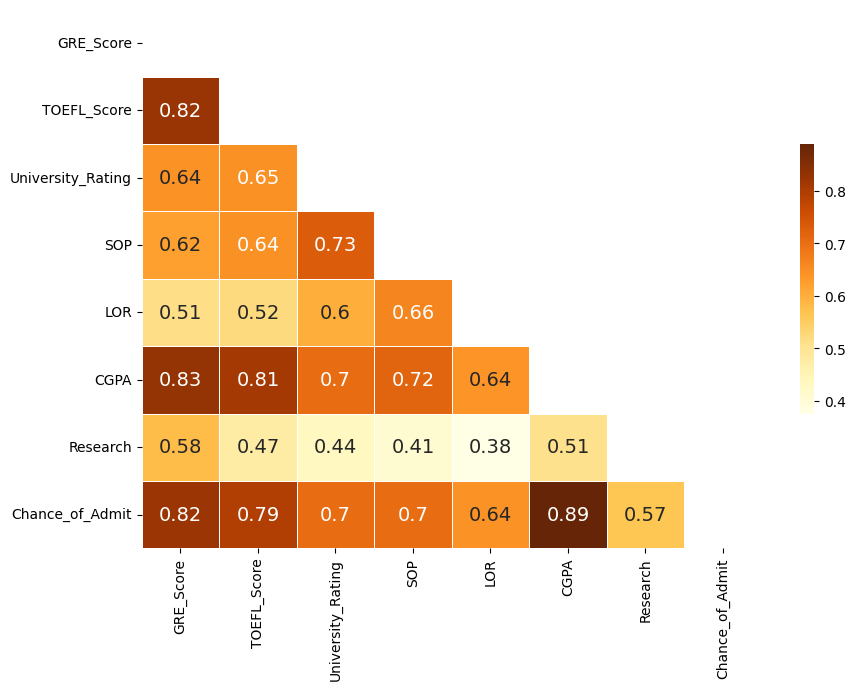

In [ ]:
f, ax = plt.subplots(figsize=(10, 7))
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask = mask, annot = True, annot_kws = {'size': 14}, linewidths=.5, cmap="YlOrBr", cbar_kws={"shrink": .5})

plt.show()

# Insights
# GRE Score, TOEFL Score & CGPA seem to be the most important factors to increase chances of admin into a college.

<Figure size 1000x700 with 0 Axes>

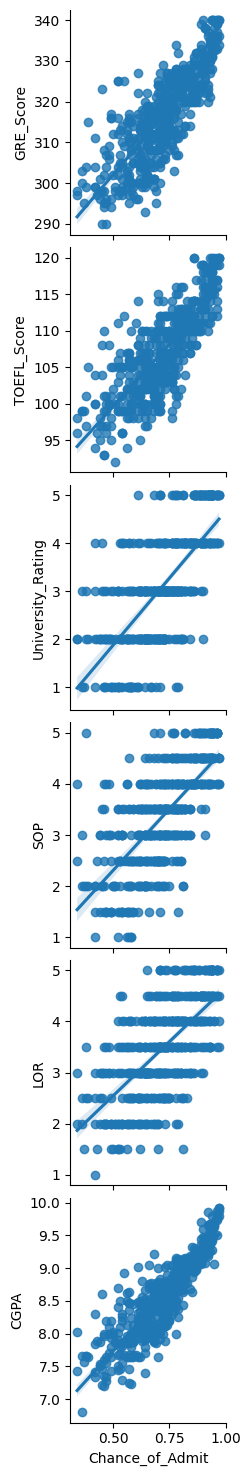

In [ ]:
fig = plt.figure() 
fig.set_size_inches(10, 7)

sns.pairplot(df, 
            y_vars=["GRE_Score","TOEFL_Score","University_Rating","SOP","LOR","CGPA"],
            x_vars=["Chance_of_Admit"],
            kind = 'reg', 
            corner = True)

plt.show()

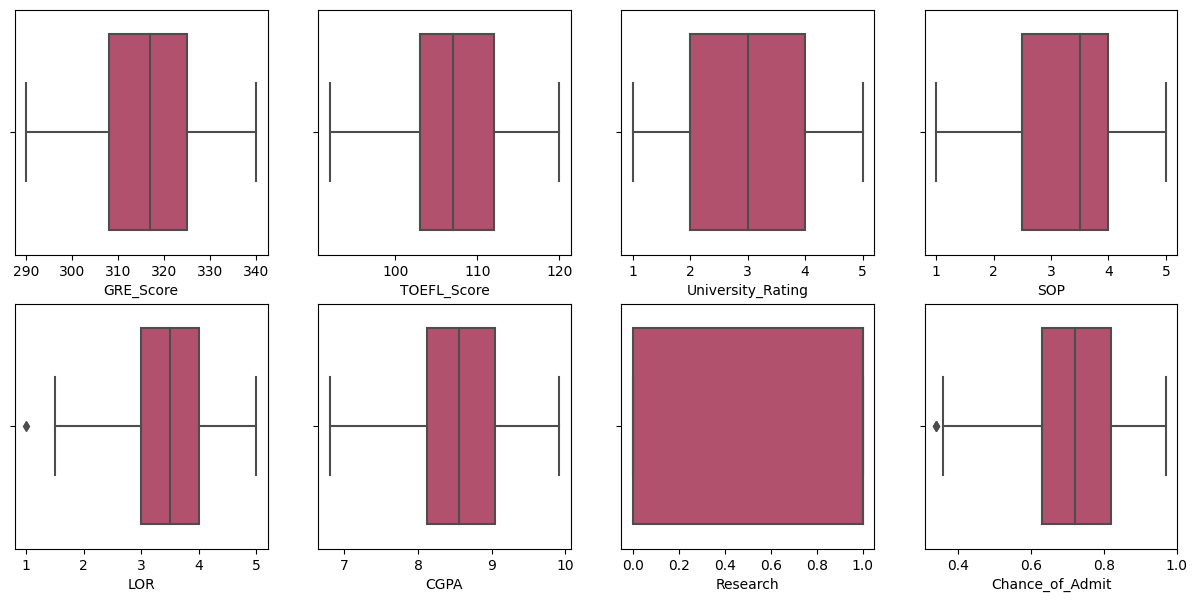

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (15,7))

sns.boxplot(data = df, x = 'GRE_Score', palette="flare", ax = ax[0][0])
sns.boxplot(data = df, x = 'TOEFL_Score', palette="flare", ax = ax[0][1])
sns.boxplot(data = df, x = 'University_Rating', palette="flare", ax = ax[0][2])
sns.boxplot(data = df, x = 'SOP', palette="flare", ax = ax[0][3])
sns.boxplot(data = df, x = 'LOR', palette="flare", ax = ax[1][0])
sns.boxplot(data = df, x = 'CGPA', palette="flare", ax = ax[1][1])
sns.boxplot(data = df, x = 'Research', palette="flare", ax = ax[1][2])
sns.boxplot(data = df, x = 'Chance_of_Admit', palette="flare", ax = ax[1][3])

plt.show()

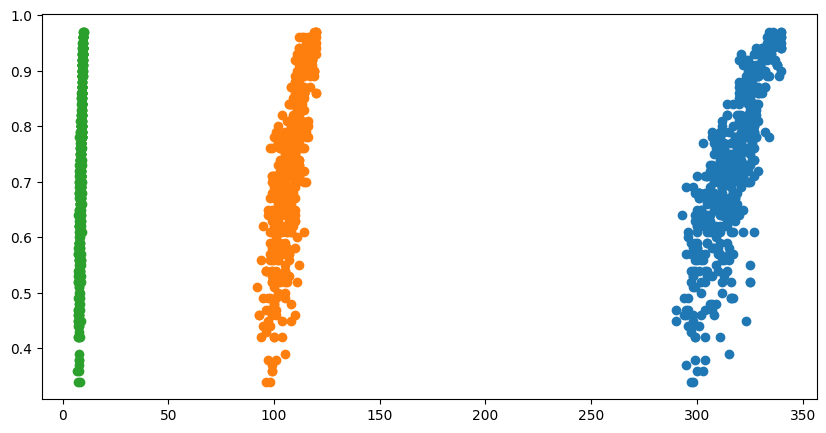

In [ ]:
plt.figure(figsize=(10,5))

plt.scatter(data = df, x = 'GRE_Score', y = 'Chance_of_Admit')
plt.scatter(data = df, x = 'TOEFL_Score', y = 'Chance_of_Admit')
plt.scatter(data = df, x = 'CGPA', y = 'Chance_of_Admit')

plt.show()

#Building the Linear Regression model


---

Now that all the assumptions of Linear Regression holds true, we go ahead and build the model

In [ ]:
x = df.drop(["Chance_of_Admit"],axis=1)
y = df.Chance_of_Admit

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,train_size=0.7)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

In [ ]:
R_square = r2_score(y_true=y_test,y_pred=y_pred)
print("R_squared: ", R_square)

R_squared:  0.7910195074277857


In [ ]:
regr.intercept_

0.7201588049238967

In [ ]:
regr.coef_

array([ 0.0243141 ,  0.01511937,  0.00704437, -0.00062201,  0.01825298,
        0.07171277,  0.01035106])

In [ ]:
coeff_df = pd.DataFrame(regr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
GRE_Score,0.024314
TOEFL_Score,0.015119
University_Rating,0.007044
SOP,-0.000622
LOR,0.018253
CGPA,0.071713
Research,0.010351


**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
#
# Fit the Lasso model
#
lasso.fit(X_train, y_train)
#
# Create the model score
#
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(-0.024302727613380037, 0.0)

In [ ]:
lasso.coef_

array([0., 0., 0., 0., 0., 0., 0.])

**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(X_train, y_train)
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 0.003, test: 0.004
R^2 train: 0.832, test: 0.791


#Assumption of Linear Regression


---


Checking all the assumptions of Linear Regression Model

**1. Linearity**

Linear Regression needs the relationship between independent and dependent variables to be linear

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


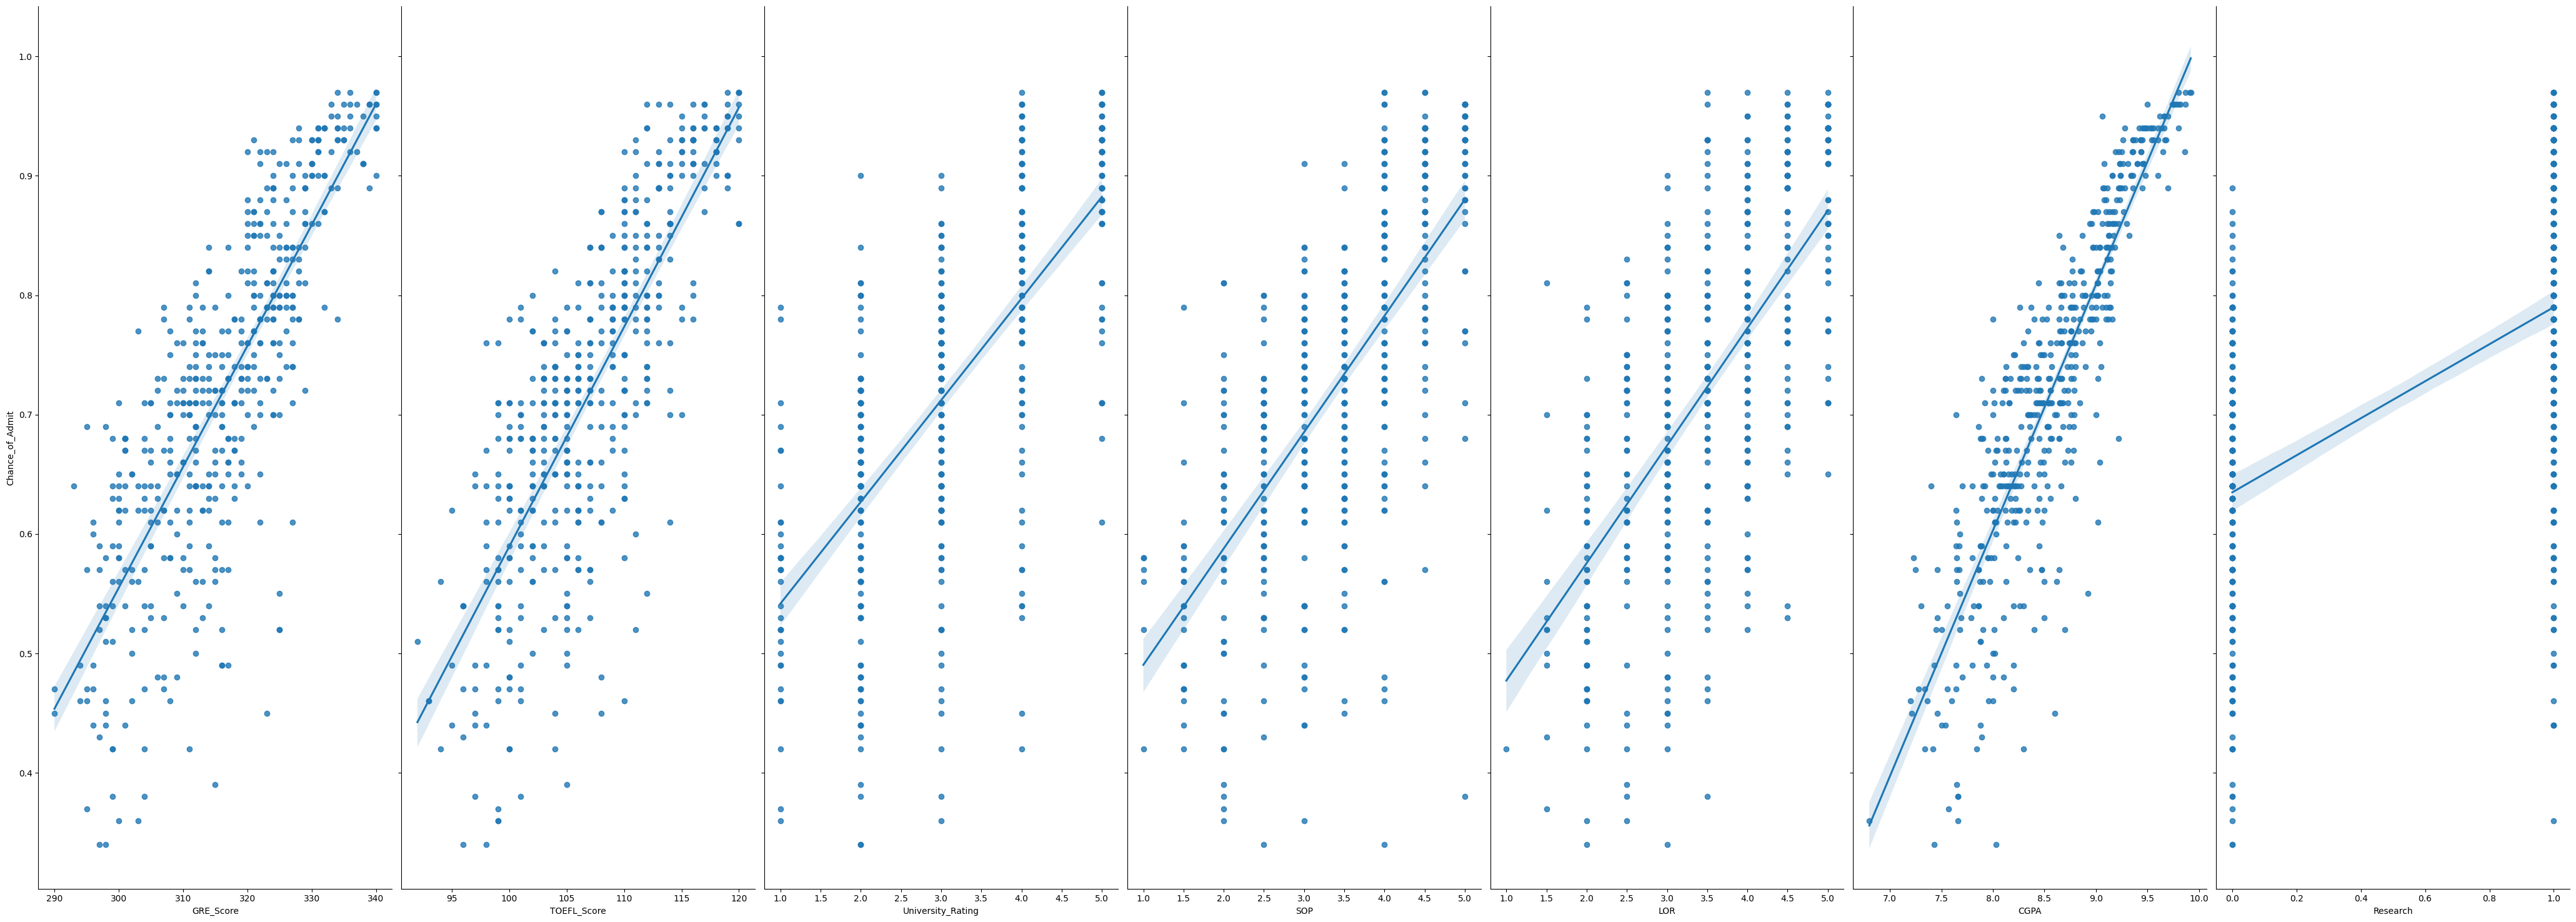

In [ ]:
# visualizing the relationship between the 'Chance of Admint' and other independent variables using scatterplots
sns.pairplot(data = df, x_vars=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research'], y_vars='Chance_of_Admit', kind = 'reg', size=15, aspect=0.4)

plt.show()

# Looing at the graphs below it looks like the the dependent variable 'Chance of Admit' has a linear relationship with the independent variables

**2. Mean of residuals**

One of the assumptions of linear regression is that the mean of the residuals should be zero

In [ ]:
residuals = y_test.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals = {}".format(mean_residuals))

# Mean of Residuals is close to zero hence the assumption holds true

Mean of Residuals = 0.005270650253676629


**3. Homoscedasticity**

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line

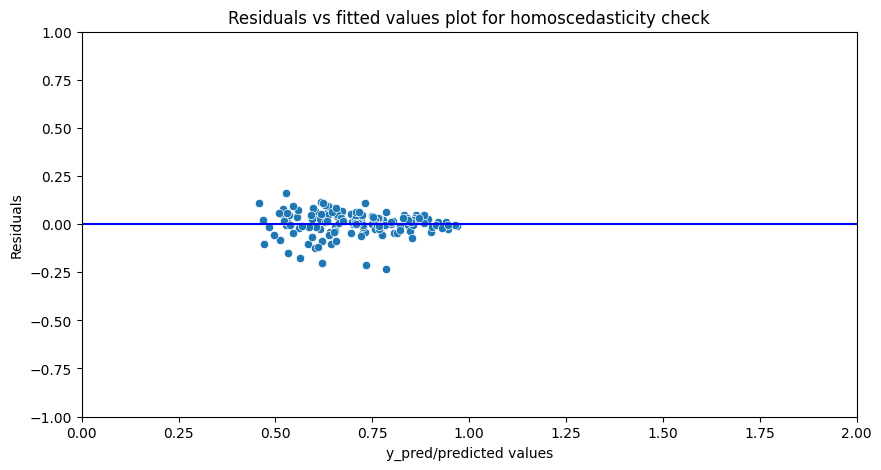

In [ ]:
plt.figure(figsize=(10,5))
p = sns.scatterplot(x = y_pred,y = residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,2)
p = sns.lineplot(x = [0,2],y = [0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

*Goldfeld Quandt Test to check homoscedasticity*

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic

Alpha(α) = 0.05 (since we want 95% confidence)

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

# Since the p-value is higher than 0.05, we fail to reject the null hypothesis. Error terms are homoscedastic for this dataset.

[('F statistic', 0.7381524347533331), ('p-value', 0.8934024569797975)]

**4. Normality of residuals**

Residuals should follow a Gaussian distribution

<ipython-input-41-a886d735c322>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


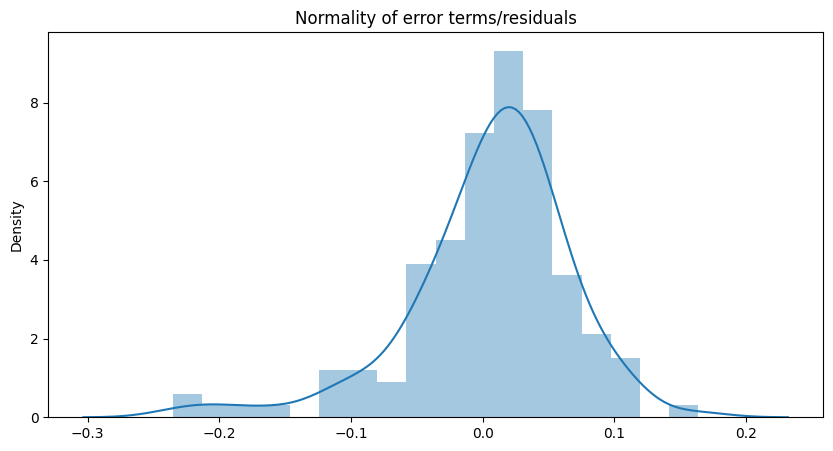

In [ ]:
plt.figure(figsize=(10,5))
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# Residuals more or less follow a normal distribution.

<Figure size 200x200 with 0 Axes>

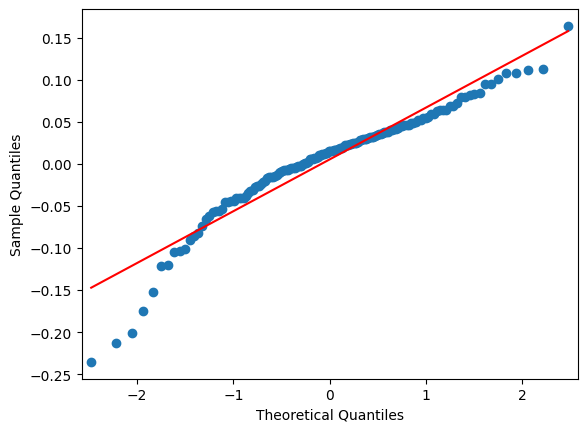

In [ ]:
import statsmodels.api as sm
# fig = plt.figure() 
# fig.set_size_inches(10, 4)

plt.figure(figsize=(2, 2))
sm.qqplot(residuals, line = 's')
plt.show()

**5. Multicollinearity**

Multicollinearity is the phenomenon when a number of the explanatory variables are strongly correlated. There should be little to no multicollinearity

In [ ]:
VIF = 1/(1 - R_square)

VIF

# VIF is close to 5, so we can safely assume there is no multicollinearity

4.7851356252997865

**6. Autocorrelation of residuals**

There should be no autocorrelation in the residuals 

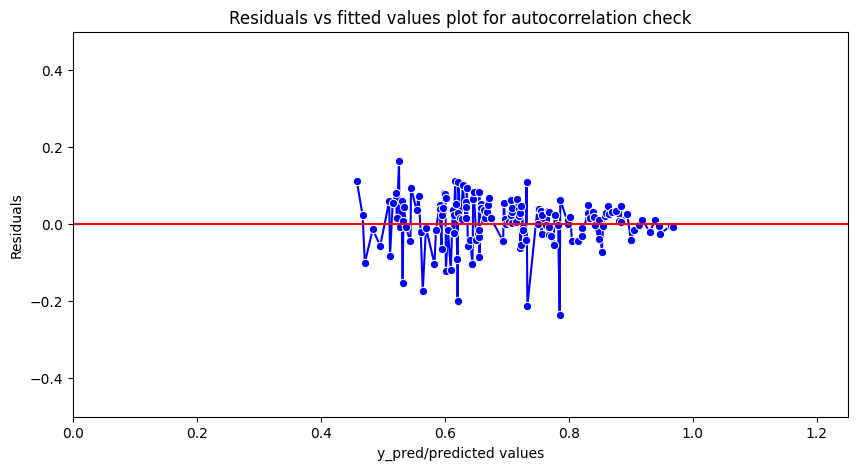

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x = y_pred,y = residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(0,1.25)
p = sns.lineplot(x = [0,1.25],y = [0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

plt.show()

*Ljungbox test to check autocorrelation*

Null Hypothesis: Autocorrelation is absent

Alternative Hypothesis: Autocorrelation is present

Alpha(α) = 0.05 (since we want 95% confidence)

In [ ]:
from statsmodels.stats import diagnostic as diag
diag.acorr_ljungbox(residuals , lags = [40])

# Since the p_value is more than alpha, we fail to reject the null hypothesis. Hence, there is no autocorrelation in the residuals

,lb_stat,lb_pvalue
40,47.609218,0.190625


#Model Performance Evaluation

---


Calculating the metrics to assess model performance

In [ ]:
R_square = r2_score(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test,y_pred)
adj_R = 1 - (1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x.shape[1]-1)

# initialise data of lists.
perf_data = [[R_square],[adj_R],[mae],[mse],[rmse],[mape]]
# Creates pandas DataFrame.
eval_ = pd.DataFrame(perf_data,columns= ["Scores"] ,index = ["R-Squared(R2)","Adjusted R-squared(Adj R2)","Mean Absolute Error(MAE)","Mean Square Error(MSE)",
                                                             "Root Mean Square Error(RMSE)","Mean Absolute Percentage Error(MAPE)"])
eval_.head()

,Scores
R-Squared(R2),0.791020
Adjusted R-squared(Adj R2),0.780718
Mean Absolute Error(MAE),0.045348
Mean Square Error(MSE),0.003813
Root Mean Square Error(RMSE),0.061748
